In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

coefficient of determination (R2): 0.15


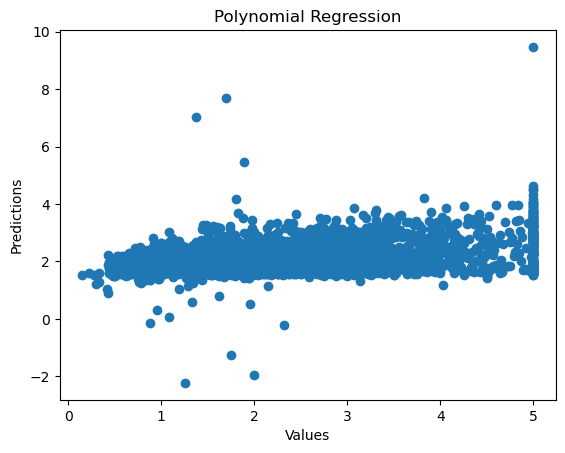

In [7]:
#Loading the Califonia housing dataset
data_Alim = fetch_california_housing()

#Fetch the Califonia housing dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

#Create a dataframe for only two relevant feautures
df_Alim= pd.DataFrame(data_Alim.data, columns=data_Alim.feature_names)
df_Alim = df_Alim[["AveRooms", "AveBedrms"]]

#Select only the AveRooms and AveBedrmsthrough fetch method 
X = X[["AveRooms", "AveBedrms"]]

#Converting into series
if isinstance(y, pd.DataFrame):
    y=y.squeeze()
#Splitting the data into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(df_Alim, data_Alim.target, test_size=0.2, random_state=0)

#Creating the polynomial features
p = PolynomialFeatures(degree=2, include_bias=False)
X_train_polynomial = p.fit_transform(X_train)
X_test_polynomial = p.transform(X_test)

#Train the model
linearReg = LinearRegression().fit(X_train_polynomial, y_train)

#Predict the data
y_prediction = linearReg.predict(X_test_polynomial)

#coefficient of the model
r2 = r2_score(y_test, y_prediction)

#Printing the coefficient of the model
print(f"coefficient of determination (R2): {r2:.2f}")

#Plotting the results
plt.scatter(y_test, y_prediction)
plt.title("Polynomial Regression")
plt.xlabel("Values")
plt.ylabel("Predictions")
plt.show()